<a href="https://colab.research.google.com/github/sushmitha6145/CodersCave/blob/main/Phase1_NormalTask_Customer_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Dataset](https://www.kaggle.com/datasets/iamprateek/store-transaction-data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load all datasets
try:
    ideal_data = pd.read_csv('/content/Hackathon_Ideal_Data.csv')
    mapping_data = pd.read_csv('/content/Hackathon_Mapping_File.csv')
    validation_data = pd.read_csv('/content/Hackathon_Validation_Data.csv')
    working_data = pd.read_csv('/content/Hackathon_Working_Data.csv')
    sample_submission = pd.read_csv('/content/Sample Submission.csv')
except FileNotFoundError as e:
    print("One or more files not found. Please check file paths and try again.")
    raise e


In [ ]:
# Display basic information about the datasets
datasets = {
    'Ideal Data': ideal_data,
    'Mapping Data': mapping_data,
    'Validation Data': validation_data,
    'Working Data': working_data,
    'Sample Submission': sample_submission
}

for name, data in datasets.items():
    print(f"\n{name}:")
    if data is not None:
        print("Shape:", data.shape)
        print("Columns:", data.columns)
        print("Head:")
        print(data.head())
    else:
        print("Dataset not available.")



Ideal Data:
Shape: (14260, 10)
Columns: Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')
Head:
  MONTH STORECODE  QTY  VALUE                GRP               SGRP  \
0    M1        P1   25     83  HAIR CONDITIONERS  HAIR CONDITIONERS   
1    M1        P1    6     22  HAIR CONDITIONERS  HAIR CONDITIONERS   
2    M1        P1    4     15  HAIR CONDITIONERS  HAIR CONDITIONERS   
3    M1        P1   15     60  HAIR CONDITIONERS  HAIR CONDITIONERS   
4    M1        P2    0      0  HAIR CONDITIONERS  HAIR CONDITIONERS   

               SSGRP                         CMP         MBRD  \
0  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
1  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
2  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED         DOVE   
3  HAIR CONDITIONERS               L'OREAL INDIA      GARNIER   
4  HAIR CONDITIONERS  HINDUSTAN UNILEVER LIMITED  CLINIC PLUS   

              

Working Data Columns: Index(['MONTH', 'STORECODE', 'DAY', 'BILL_ID', 'BILL_AMT', 'QTY', 'VALUE',
       'PRICE', 'GRP', 'SGRP', 'SSGRP', 'CMP', 'MBRD', 'BRD'],
      dtype='object')


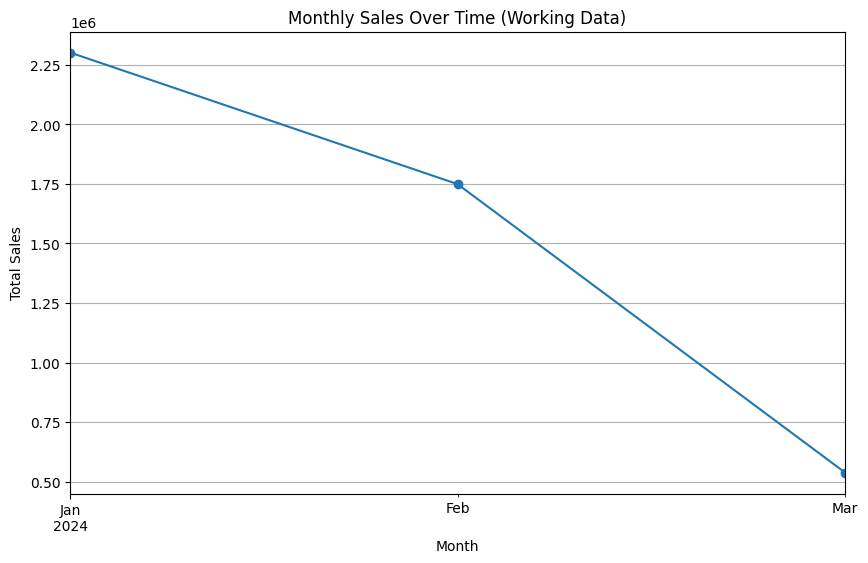

In [ ]:
# Print column names to verify
print("Working Data Columns:", working_data.columns)

# Assuming 'MONTH' has values like 'M1', 'M2', etc. and 'BILL_AMT' represents sales
month_column = 'MONTH'
sales_column = 'BILL_AMT'
year = 2024  # Use a fixed year if year information is not available

# Mapping for month names
month_mapping = {'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5, 'M6': 6,
                 'M7': 7, 'M8': 8, 'M9': 9, 'M10': 10, 'M11': 11, 'M12': 12}

# Visualize total sales over time from working data
if working_data is not None and month_column in working_data.columns and sales_column in working_data.columns:
    # Convert month names to numerical month
    working_data['Month_Num'] = working_data[month_column].map(month_mapping)

    # Create a 'Date' column using the assumed year and the numerical month
    working_data['Date'] = pd.to_datetime(working_data['Month_Num'].apply(lambda x: f'{year}-{x:02d}'), format='%Y-%m')

    # Group by the new 'Date' column and sum sales
    monthly_sales = working_data.groupby(working_data['Date'].dt.to_period('M'))[sales_column].sum()

    # Plot the data
    monthly_sales.plot(kind='line', marker='o', figsize=(10, 6))
    plt.title('Monthly Sales Over Time (Working Data)')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()
else:
    print("Working data or necessary columns not available for visualization.")


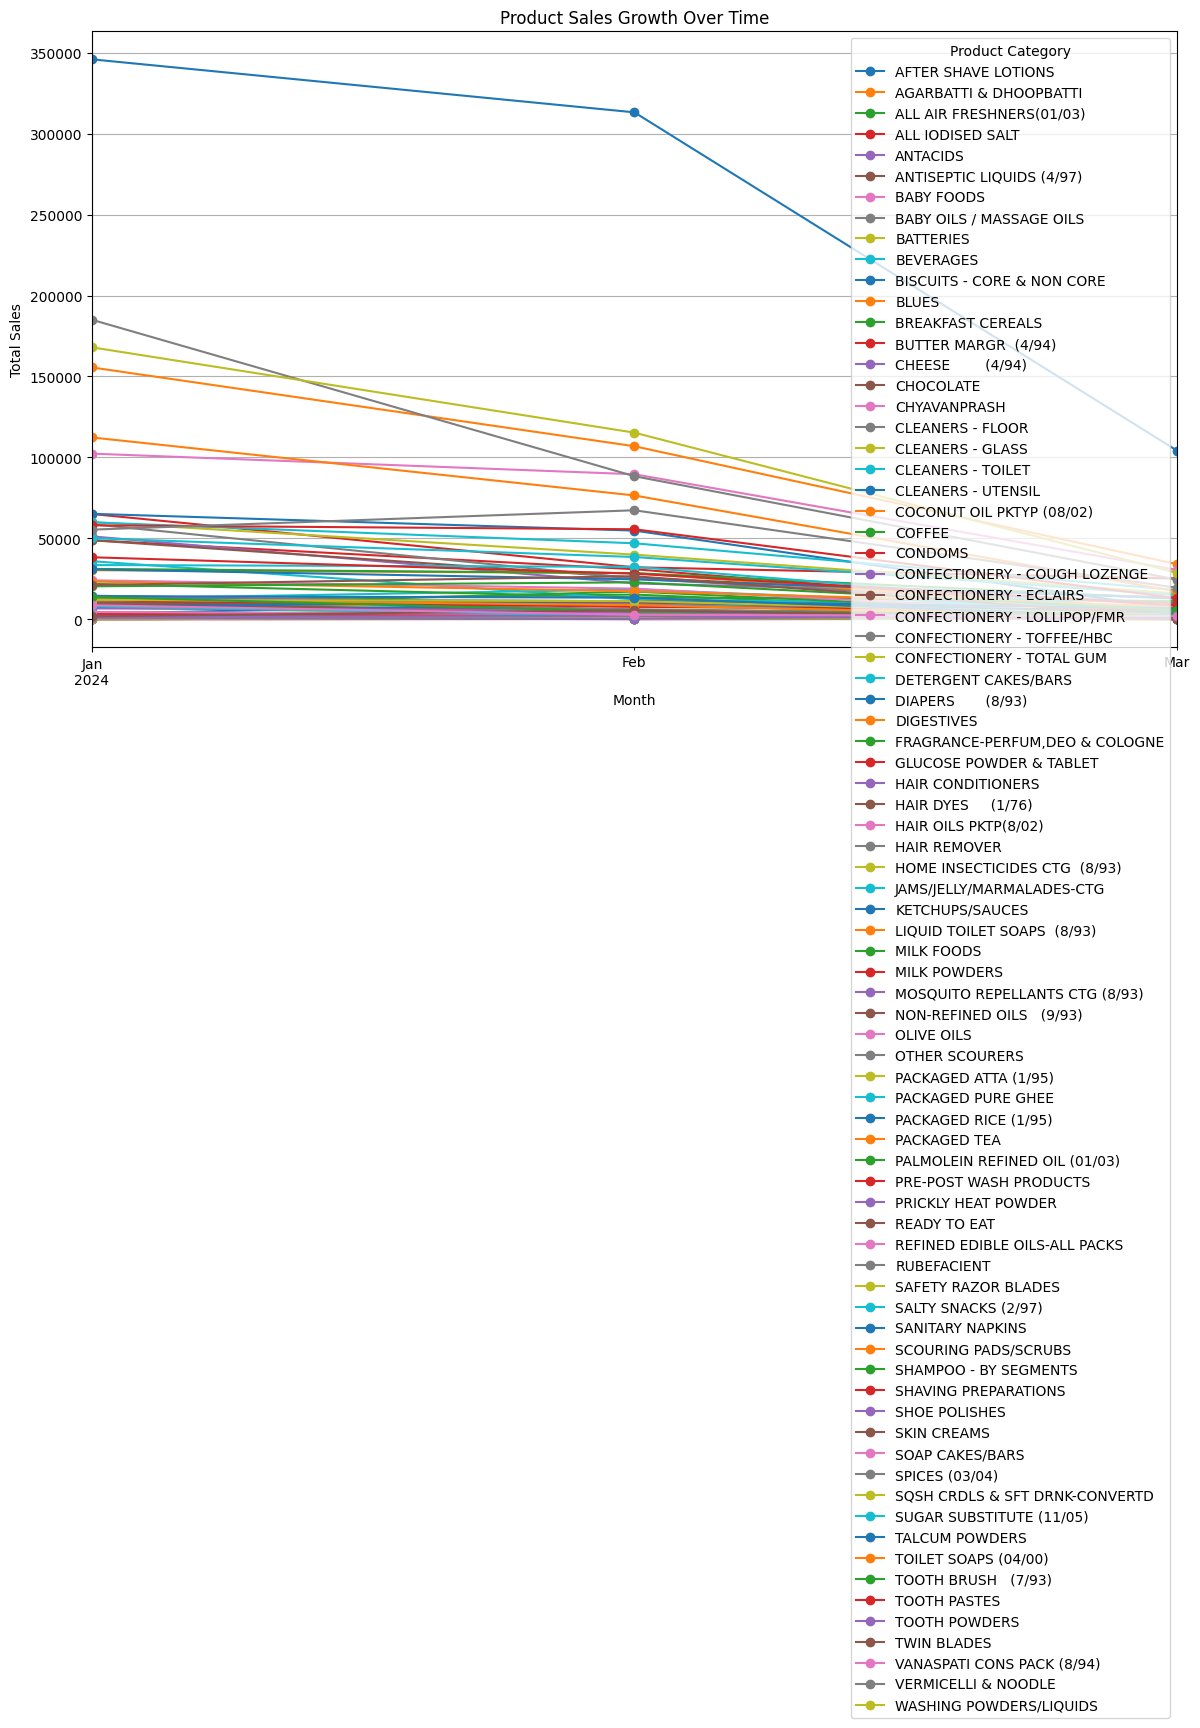

In [ ]:
# Ensure the necessary columns are present
product_column = 'GRP'
sales_column = 'BILL_AMT'
month_column = 'MONTH'
year = 2024  # Use a fixed year if year information is not available

# Mapping for month names
month_mapping = {'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5, 'M6': 6,
                 'M7': 7, 'M8': 8, 'M9': 9, 'M10': 10, 'M11': 11, 'M12': 12}

if product_column in working_data.columns and sales_column in working_data.columns and month_column in working_data.columns:
    # Convert month names to numerical month
    working_data['Month_Num'] = working_data[month_column].map(month_mapping)

    # Create a 'Date' column using the assumed year and the numerical month
    working_data['Date'] = pd.to_datetime(working_data['Month_Num'].apply(lambda x: f'{year}-{x:02d}'), format='%Y-%m')

    # Group by 'Date' and 'Product' to sum sales
    product_sales_over_time = working_data.groupby([working_data['Date'].dt.to_period('M'), product_column])[sales_column].sum().unstack()

    # Plot the data
    product_sales_over_time.plot(kind='line', marker='o', figsize=(14, 8))
    plt.title('Product Sales Growth Over Time')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend(title='Product Category')
    plt.grid(True)
    plt.show()
else:
    print(f"Necessary columns not available in working data: {product_column}, {sales_column}, {month_column}")


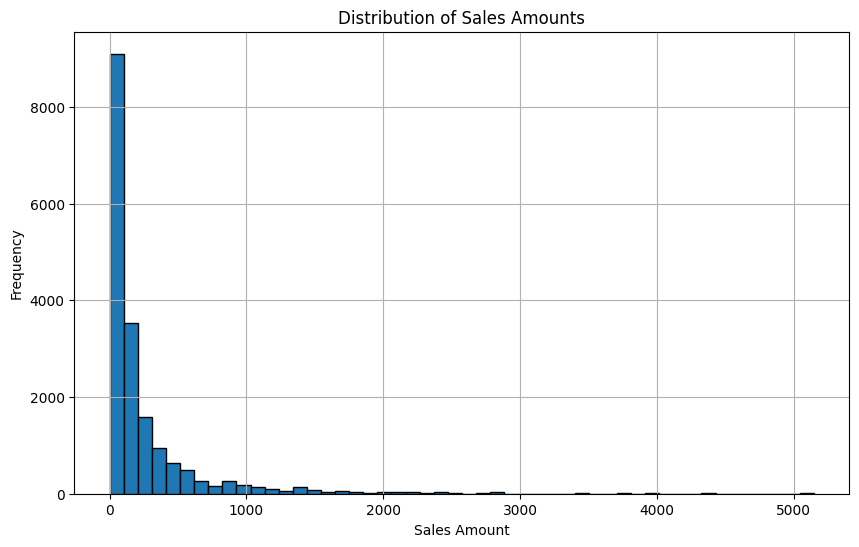

In [ ]:
# Visualize distribution of sales amounts
if sales_column in working_data.columns:
    working_data[sales_column].plot(kind='hist', bins=50, figsize=(10, 6), edgecolor='black')
    plt.title('Distribution of Sales Amounts')
    plt.xlabel('Sales Amount')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print(f"Column '{sales_column}' not available in working data.")


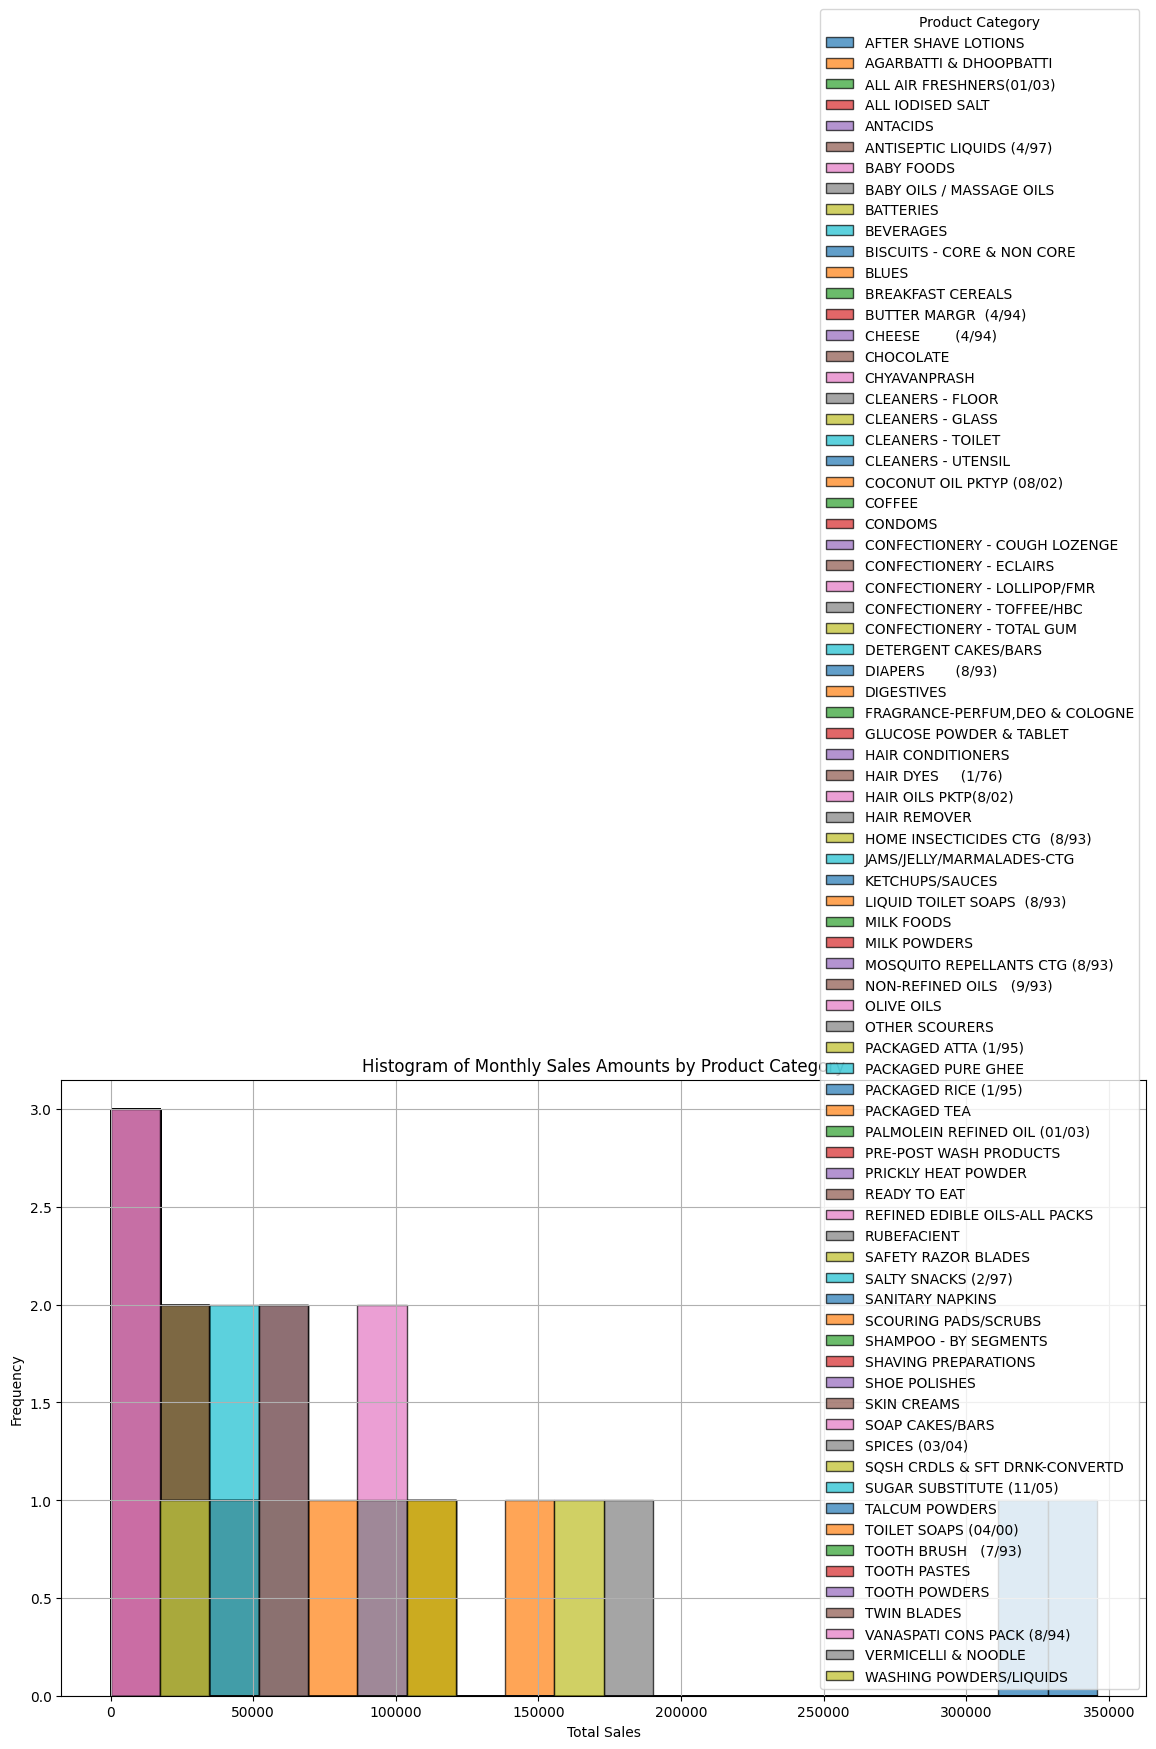

In [ ]:
# Ensure the necessary columns are present
product_column = 'GRP'
sales_column = 'BILL_AMT'
month_column = 'MONTH'
year = 2024  # Use a fixed year if year information is not available

# Mapping for month names
month_mapping = {'M1': 1, 'M2': 2, 'M3': 3, 'M4': 4, 'M5': 5, 'M6': 6,
                 'M7': 7, 'M8': 8, 'M9': 9, 'M10': 10, 'M11': 11, 'M12': 12}

if product_column in working_data.columns and sales_column in working_data.columns and month_column in working_data.columns:
    # Convert month names to numerical month
    working_data['Month_Num'] = working_data[month_column].map(month_mapping)

    # Create a 'Date' column using the assumed year and the numerical month
    working_data['Date'] = pd.to_datetime(working_data['Month_Num'].apply(lambda x: f'{year}-{x:02d}'), format='%Y-%m')

    # Group by 'Date' and 'Product' to sum sales
    product_sales_over_time = working_data.groupby([working_data['Date'].dt.to_period('M'), product_column])[sales_column].sum().unstack().fillna(0)

    # Plot histograms for each product category
    product_sales_over_time.plot(kind='hist', bins=20, figsize=(14, 8), alpha=0.7, edgecolor='black')
    plt.title('Histogram of Monthly Sales Amounts by Product Category')
    plt.xlabel('Total Sales')
    plt.ylabel('Frequency')
    plt.legend(title='Product Category')
    plt.grid(True)
    plt.show()
else:
    print(f"Necessary columns not available in working data: {product_column}, {sales_column}, {month_column}")


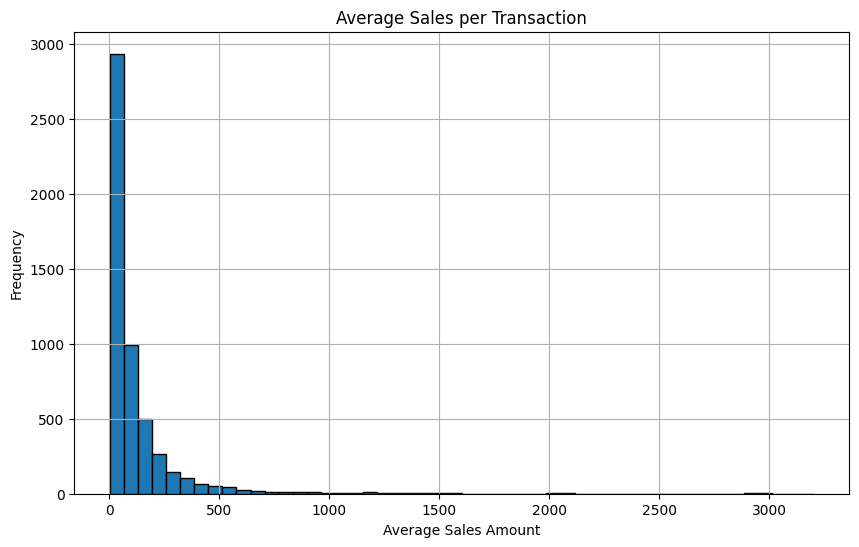

In [ ]:
# Calculate and visualize average sales per transaction
if 'BILL_ID' in working_data.columns:
    avg_sales_per_transaction = working_data.groupby('BILL_ID')[sales_column].mean()
    avg_sales_per_transaction.plot(kind='hist', bins=50, figsize=(10, 6), edgecolor='black')
    plt.title('Average Sales per Transaction')
    plt.xlabel('Average Sales Amount')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("Column 'BILL_ID' not available in working data.")
